In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'Covid-19.csv'
folder_path = r'..\Datos-COVID19\output\producto1'
file_path = os.path.join(folder_path, file_name)

In [3]:
df = pd.read_csv(file_path)
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,54.1
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,331.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
lst_cmn = ['Pedro Aguirre Cerda', 'Cerrillos', 'Quinta Normal', 'Nunoa']
dict_area = {'Pedro Aguirre Cerda':12.0,
             'Cerrillos':21.0,
             'Quinta Normal':10.0,
             'Nunoa':16.9,
             'Las Condes':33.0}
lst_df = []
ncmn = len(lst_cmn)

for ind in range(ncmn):
    lst_df.append(df[df.Comuna == lst_cmn[ind]]) 

for ind in range(ncmn):
    display(lst_df[ind])

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,Tasa
113,Metropolitana,13,Pedro Aguirre Cerda,13121,107803.0,7.0,13.0,13.0,16.0,19.0,36.0,54.0,70.0,78.0,72.4


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,Tasa
85,Metropolitana,13,Cerrillos,13102,88956.0,0.0,4.0,4.0,5.0,11.0,21.0,29.0,39.0,48.0,54.0


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,Tasa
121,Metropolitana,13,Quinta Normal,13126,136368.0,21.0,25.0,35.0,41.0,57.0,69.0,84.0,105.0,125.0,91.7


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,Tasa
110,Metropolitana,13,Nunoa,13120,250192.0,67.0,84.0,93.0,107.0,118.0,155.0,171.0,188.0,217.0,86.7


In [13]:
def bld_df(df, area):
    index = []
    cases = []
    df_out = pd.DataFrame()
    index = list(df.columns[5:-1].values)
    idx = df.index[0]
    for date in index:
        num = df.loc[idx][date]
        cases.append(float(num)) 
    index.insert(0,'2020-3-28')
    cases.insert(0,float(0))
    index = [pd.to_datetime(ind) for ind in index]
    df_out = pd.DataFrame(cases, index=index, columns=['cum_cases'])
    df_out['date']                = df_out.index.values    
    df_out['cum_cases_per_100th'] = 1e5 * df_out['cum_cases'] / float(df.Poblacion)
    df_out['new_cases']           = df_out['cum_cases'].diff(periods=1)
    df_out['new_cases3']          = df_out['cum_cases'].diff(periods=3)
    df_out['new_cases5']          = df_out['cum_cases'].diff(periods=5)
    df_out['new_cases7']          = df_out['cum_cases'].diff(periods=7)
    df_out['shift_cum_cases']     = df_out['cum_cases'].shift(1, axis=0)
    df_out['increment']           = 100.0 * df_out['new_cases'] / df_out['cum_cases']
    df_out['increment3']          = 100.0 * df_out['new_cases3'] / df_out['cum_cases']
    df_out['increment5']          = 100.0 * df_out['new_cases5'] / df_out['cum_cases']
    df_out['increment7']          = 100.0 * df_out['new_cases7'] / df_out['cum_cases']
    df_out['new_cases_per_100th'] = 1e5 * df_out['new_cases'] / float(df.Poblacion)
    df_out['new_cases3_per_100th']= 1e5 * df_out['new_cases3'] / float(df.Poblacion)
    df_out['new_cases5_per_100th']= 1e5 * df_out['new_cases5'] / float(df.Poblacion)
    df_out['new_cases7_per_100th']= 1e5 * df_out['new_cases7'] / float(df.Poblacion)
    df_out['new_cas_per_100th_area'] = 1e5 * df_out['new_cases'] / float(df.Poblacion) / area
    df_out['new_cas3_per_100th_area']= 1e5 * df_out['new_cases3'] / float(df.Poblacion) / area
    df_out['new_cas5_per_100th_area']= 1e5 * df_out['new_cases5'] / float(df.Poblacion) / area
    df_out['new_cas7_per_100th_area']= 1e5 * df_out['new_cases7'] / float(df.Poblacion) / area
    
    
    return df_out

def itp_df(df):
    df_itp = df.resample('D').mean()
    df_itp = df_itp.interpolate()
    
    return df_itp

In [14]:
lst_ts = []
lst_ts_tmp = []

for ind in range(ncmn):
    area = dict_area[lst_cmn[ind]]
    lst_ts_tmp.append(bld_df(lst_df[ind], area))

for ind in range(ncmn):
    lst_ts.append(itp_df(lst_ts_tmp[ind]))

for ind in range(ncmn):
    display(lst_ts[ind])

,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,3.5,3.246663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,7.0,6.493326,7.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,6.493326,NaN,NaN,NaN,0.541110,NaN,NaN,NaN
2020-03-31,10.0,9.276180,6.500000,NaN,NaN,NaN,3.500000,73.076923,NaN,NaN,NaN,6.029517,NaN,NaN,NaN,0.502460,NaN,NaN,NaN
2020-04-01,13.0,12.059034,6.000000,NaN,NaN,NaN,7.000000,46.153846,NaN,NaN,NaN,5.565708,NaN,NaN,NaN,0.463809,NaN,NaN,NaN
2020-04-02,13.0,12.059034,3.000000,NaN,NaN,NaN,10.000000,23.076923,NaN,NaN,NaN,2.782854,NaN,NaN,NaN,0.231904,NaN,NaN,NaN
2020-04-03,13.0,12.059034,0.000000,13.000000,NaN,NaN,13.000000,0.000000,100.000000,NaN,NaN,0.000000,12.059034,NaN,NaN,0.000000,1.004919,NaN,NaN
2020-04-04,14.0,12.986652,1.000000,11.666667,NaN,NaN,13.000000,6.250000,85.416667,NaN,NaN,0.927618,10.822210,NaN,NaN,0.077301,0.901851,NaN,NaN
2020-04-05,15.0,13.914270,2.000000,10.333333,NaN,NaN,13.000000,12.500000,70.833333,NaN,NaN,1.855236,9.585386,NaN,NaN,0.154603,0.798782,NaN,NaN
2020-04-06,16.0,14.841888,3.000000,9.000000,NaN,NaN,13.000000,18.750000,56.250000,NaN,NaN,2.782854,8.348562,NaN,NaN,0.231904,0.695713,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2020-03-31,2.000000,2.248303,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,2.248303,NaN,NaN,NaN,0.107062,NaN,NaN,NaN
2020-04-01,4.000000,4.496605,4.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,4.496605,NaN,NaN,NaN,0.214124,NaN,NaN,NaN
2020-04-02,4.000000,4.496605,2.000000,NaN,NaN,NaN,2.000000,50.000000,NaN,NaN,NaN,2.248303,NaN,NaN,NaN,0.107062,NaN,NaN,NaN
2020-04-03,4.000000,4.496605,0.000000,4.000000,NaN,NaN,4.000000,0.000000,100.000000,NaN,NaN,0.000000,4.496605,NaN,NaN,0.000000,0.214124,NaN,NaN
2020-04-04,4.333333,4.871322,0.333333,4.333333,NaN,NaN,4.000000,6.666667,100.000000,NaN,NaN,0.374717,4.871322,NaN,NaN,0.017844,0.231968,NaN,NaN
2020-04-05,4.666667,5.246039,0.666667,4.666667,NaN,NaN,4.000000,13.333333,100.000000,NaN,NaN,0.749434,5.246039,NaN,NaN,0.035687,0.249811,NaN,NaN
2020-04-06,5.000000,5.620756,1.000000,5.000000,NaN,NaN,4.000000,20.000000,100.000000,NaN,NaN,1.124151,5.620756,NaN,NaN,0.053531,0.267655,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,10.5,7.699754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,21.0,15.399507,21.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,15.399507,NaN,NaN,NaN,1.539951,NaN,NaN,NaN
2020-03-31,23.0,16.866127,12.500000,NaN,NaN,NaN,10.500000,58.000000,NaN,NaN,NaN,9.166373,NaN,NaN,NaN,0.916637,NaN,NaN,NaN
2020-04-01,25.0,18.332747,4.000000,NaN,NaN,NaN,21.000000,16.000000,NaN,NaN,NaN,2.933239,NaN,NaN,NaN,0.293324,NaN,NaN,NaN
2020-04-02,30.0,21.999296,7.000000,NaN,NaN,NaN,23.000000,22.285714,NaN,NaN,NaN,5.133169,NaN,NaN,NaN,0.513317,NaN,NaN,NaN
2020-04-03,35.0,25.665845,10.000000,35.0,NaN,NaN,25.000000,28.571429,100.000000,NaN,NaN,7.333099,25.665845,NaN,NaN,0.733310,2.566585,NaN,NaN
2020-04-04,37.0,27.132465,8.666667,30.0,NaN,NaN,28.333333,23.925668,82.926829,NaN,NaN,6.355352,21.999296,NaN,NaN,0.635535,2.199930,NaN,NaN
2020-04-05,39.0,28.599085,7.333333,25.0,NaN,NaN,31.666667,19.279907,65.853659,NaN,NaN,5.377606,18.332747,NaN,NaN,0.537761,1.833275,NaN,NaN
2020-04-06,41.0,30.065705,6.000000,20.0,NaN,NaN,35.000000,14.634146,48.780488,NaN,NaN,4.399859,14.666197,NaN,NaN,0.439986,1.466620,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,33.500000,13.389717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,67.000000,26.779433,67.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,26.779433,NaN,NaN,NaN,1.584582,NaN,NaN,NaN
2020-03-31,75.500000,30.176824,42.000000,NaN,NaN,NaN,33.500000,60.119048,NaN,NaN,NaN,16.787108,NaN,NaN,NaN,0.993320,NaN,NaN,NaN
2020-04-01,84.000000,33.574215,17.000000,NaN,NaN,NaN,67.000000,20.238095,NaN,NaN,NaN,6.794782,NaN,NaN,NaN,0.402058,NaN,NaN,NaN
2020-04-02,88.500000,35.372834,13.000000,NaN,NaN,NaN,75.500000,14.957757,NaN,NaN,NaN,5.196009,NaN,NaN,NaN,0.307456,NaN,NaN,NaN
2020-04-03,93.000000,37.171452,9.000000,93.000000,NaN,NaN,84.000000,9.677419,100.000000,NaN,NaN,3.597237,37.171452,NaN,NaN,0.212854,2.199494,NaN,NaN
2020-04-04,97.666667,39.036686,10.666667,75.333333,NaN,NaN,87.000000,10.812984,79.127726,NaN,NaN,4.263392,30.110209,NaN,NaN,0.252272,1.781669,NaN,NaN
2020-04-05,102.333333,40.901921,12.333333,57.666667,NaN,NaN,90.000000,11.948548,58.255452,NaN,NaN,4.929547,23.048965,NaN,NaN,0.291689,1.363844,NaN,NaN
2020-04-06,107.000000,42.767155,14.000000,40.000000,NaN,NaN,93.000000,13.084112,37.383178,NaN,NaN,5.595703,15.987721,NaN,NaN,0.331107,0.946019,NaN,NaN


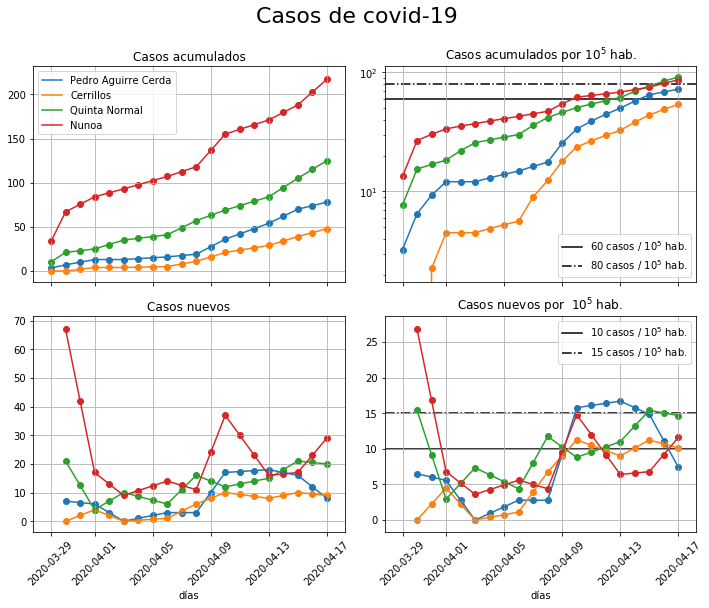

In [15]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Casos de covid-19',  y=1.05, fontsize = 22)

column = 'cum_cases'
title = 'Casos acumulados'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'cum_cases_per_100th'
title = 'Casos acumulados por $10^5$ hab.'
loc_leg = 'lower right'
log_scale = True
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases'
title = 'Casos nuevos'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases_per_100th'
title = 'Casos nuevos por  $10^5$ hab.'
xlabel = 'días'
loc_leg = 'best'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=10, c="k", linestyle='-', zorder=0, label='10 casos / $10^5$ hab.')
axs[1,1].axhline(y=15, c="k", linestyle='-.', zorder=0, label='15 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

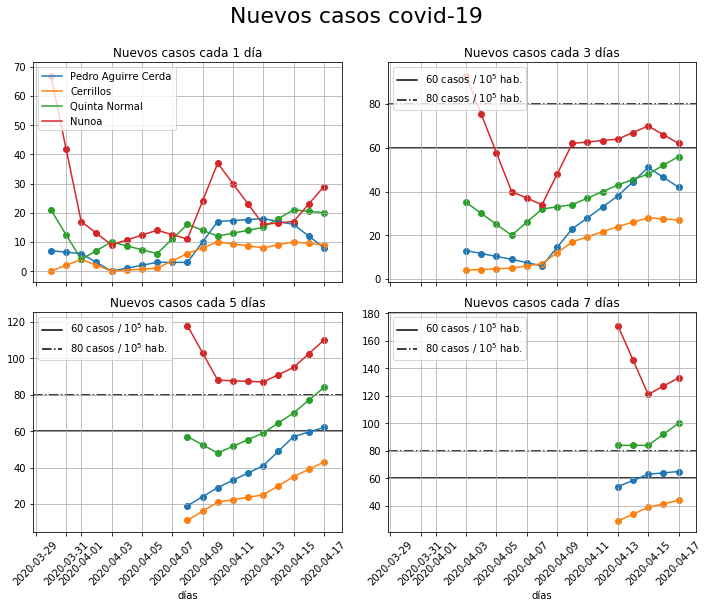

In [16]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19',  y=1.05, fontsize = 22)

column = 'new_cases'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

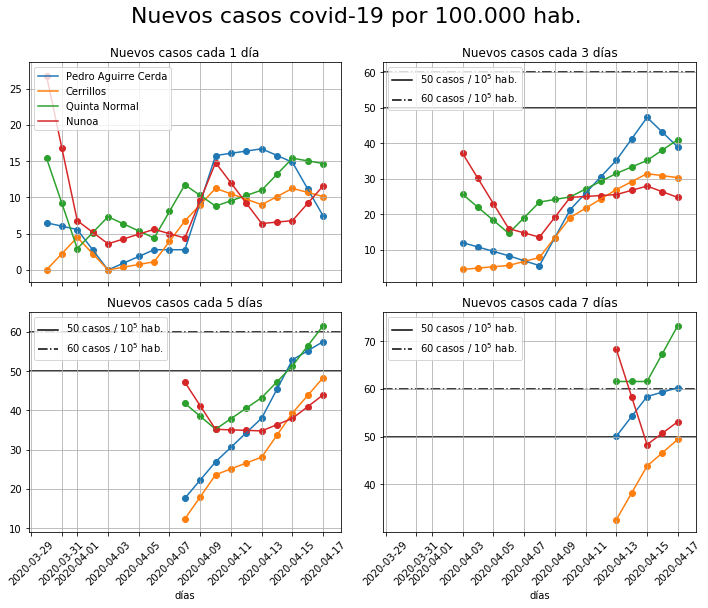

In [17]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 100.000 hab.',  y=1.05, fontsize = 22)

column = 'new_cases_per_100th'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3_per_100th'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5_per_100th'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7_per_100th'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


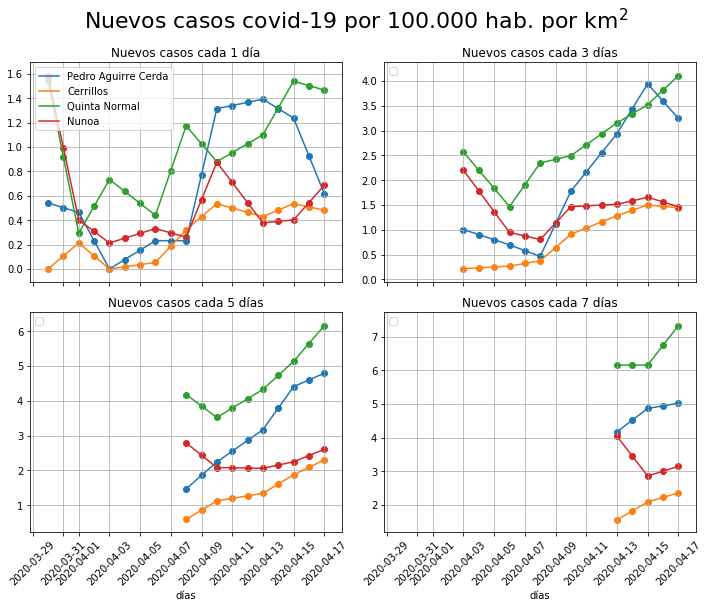

In [18]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 100.000 hab. por km$^2$',  y=1.05, fontsize = 22)

column = 'new_cas_per_100th_area'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cas3_per_100th_area'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
#axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cas5_per_100th_area'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
#axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cas7_per_100th_area'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
#axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


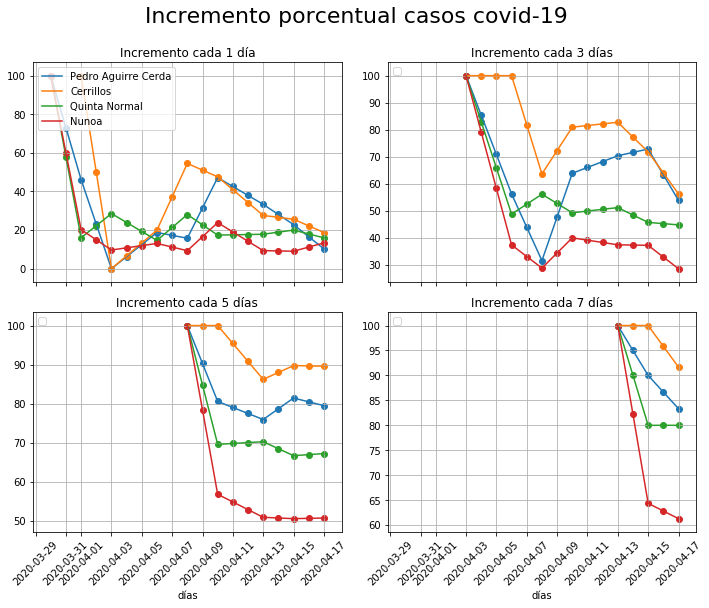

In [19]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Incremento porcentual casos covid-19',  y=1.05, fontsize = 22)

column = 'increment'
title = 'Incremento cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'increment3'
title = 'Incremento cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
#axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'increment5'
title = 'Incremento cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
#axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'increment7'
title = 'Incremento cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
#axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)